In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport



Data Dictionary

    Invoice id: Computer generated sales slip invoice identification number
    Branch: Branch of supercenter (3 branches are available identified by A, B and C).
    City: Location of supercenters
    Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
    Gender: Gender type of customer
    Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
    Unit price: Price of each product in USD
    Quantity: Number of products purchased by customer
    Tax: 5% tax fee for customer buying
    Total: Total price including tax
    Date: Date of purchase (Record available from January 2019 to March 2019)
    Time: Purchase time (10am to 9pm)
    Payment: Payment used by customer for purchase (3 methods are available \u2013 Cash, Credit card and Ewallet)
    COGS: Cost of goods sold
    Gross margin percentage: Gross margin percentage
    Gross income: Gross income
    Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,NaN,10.0,8.7450,183.6450,2/22/19,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,NaN,1.0,3.0475,63.9975,2/18/19,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,NaN,1.0,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,NaN,10.0,48.6900,1022.4900,3/2/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,NaN,1.0,1.5920,33.4320,2/9/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.8030,121.8630,3/10/19,20:46,Ewallet,116.06,4.761905,5.8030,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.4780,640.0380,1/26/19,15:17,Cash,609.56,4.761905,30.4780,5.5


In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.index
#tells me the range of the index

RangeIndex(start=0, stop=1003, step=1)

### So the first step should be to check the types and change it if we deem it necessary to avoid erronious data in the future

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df['Date']
#but it is of object data type whereas it should be int date-time format

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [10]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [11]:
#IT IS CONVENTION TO SET THE DATE COLUMN AS AS THE INDEX
df.set_index('Date',inplace=True)

In [12]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df.describe() ##basic numerics for every numerical data

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [14]:
df.describe(include='all') #includes all the variables, quantitative as well as categorical

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1003,1003,1003,924,1003,960,996.000000,983.000000,1003.000000,1003.000000,1003,1003,1003.000000,1.003000e+03,1003.000000,1003.000000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,506,3,NaN,NaN,NaN,NaN
top,849-09-3807,A,Yangon,Normal,Female,Fashion accessories,NaN,NaN,NaN,NaN,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,2,342,342,470,502,172,NaN,NaN,NaN,NaN,7,346,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.764568,5.501526,15.400368,323.407726,NaN,NaN,308.007358,4.761905e+00,15.400368,6.972682
std,NaN,NaN,NaN,NaN,NaN,NaN,26.510165,2.924673,11.715192,246.019028,NaN,NaN,234.303836,8.886215e-16,11.715192,1.717647
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,10.170000,4.761905e+00,0.508500,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,33.125000,3.000000,5.894750,123.789750,NaN,NaN,117.895000,4.761905e+00,5.894750,5.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.420000,5.000000,12.096000,254.016000,NaN,NaN,241.920000,4.761905e+00,12.096000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,78.085000,8.000000,22.539500,473.329500,NaN,NaN,450.790000,4.761905e+00,22.539500,8.500000


# UNIVARIATE ANALYSIS


### There is a different way to approach every data set and so we should proceed as follows

Question 1: What does the distribution of customer ratings looks like? Is it skewed?
 

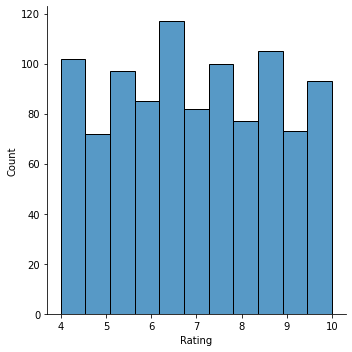

In [15]:
%matplotlib inline
sns.displot(df['Rating'])

#From the data, it seems that the data is relatively uniform as there is no skew in either direction.

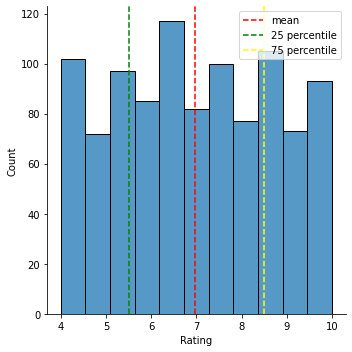

In [16]:
#in the same plot, we can even plot the mean as well.
%matplotlib inline
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
#axvline indicates that the line drawn will be vertical
#we set the color as well as line
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls="--",label='25 percentile') #25 percentile/ lower quartile
plt.axvline(x=np.percentile(df['Rating'],75),c='yellow',ls="--",label='75 percentile')
plt.legend()

### Q2 Do aggregate Sale numbers differ between branches?

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

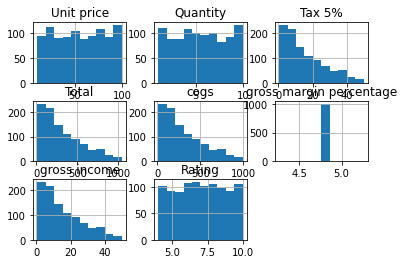

In [17]:
df.hist()
# this function creates histograms for every quantitative variable

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

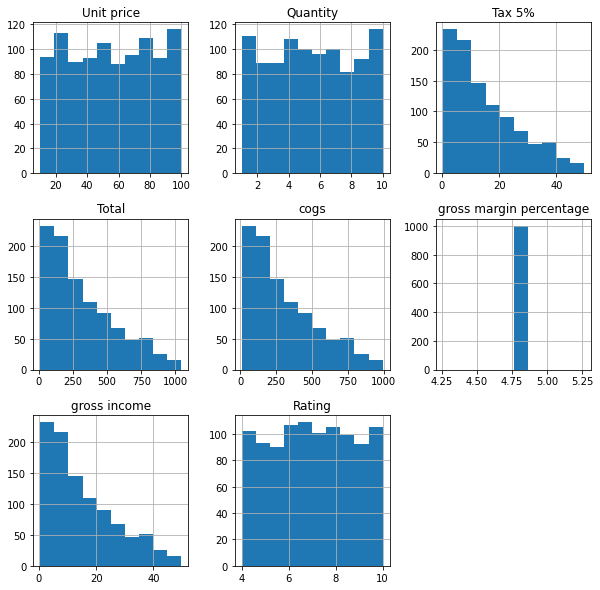

In [18]:
df.hist(figsize=(10,10)) 

#divisions of 10 on the x-axis were made.
#where exactly data is concentrated. between which ranges

C:\Users\mehra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

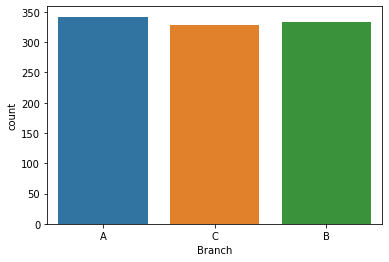

In [19]:
sns.countplot(df['Branch'])

#every row in the data represents a sale. How much do the sales differ between the branches is given by this countplot
# annd to get the exact values we can do


In [20]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

C:\Users\mehra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

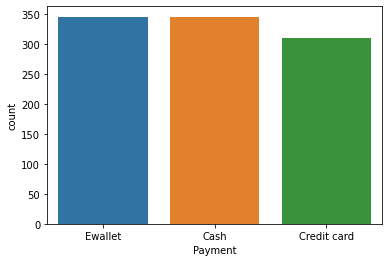

In [21]:
#countplpots can even be used for categorical variables to count the number of them in a category

sns.countplot(df['Payment'])                                                         

# BIVARIATE ANALYSIS

### Q Is there a relation between gross income and customer ratings

C:\Users\mehra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross income', ylabel='Rating'>

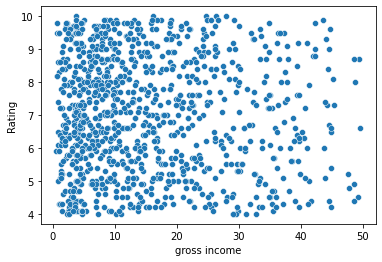

In [22]:
#To see such relationship scatterplots usually help
sns.scatterplot(df['gross income'],df['Rating'])

C:\Users\mehra\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross income', ylabel='Rating'>

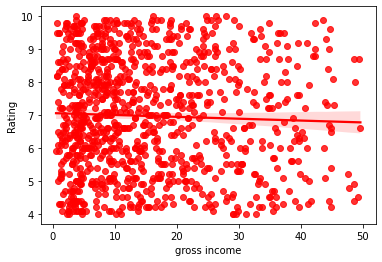

In [23]:
#Seems like there is no relation. To solidify that hypothesis, I used a Regression plot
sns.regplot(df['gross income'],df['Rating'],color='red')

#As the regression line is flat, it symbolizes that there is not much correlation between the 2 variables

#### Do different branches show, different gross income?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

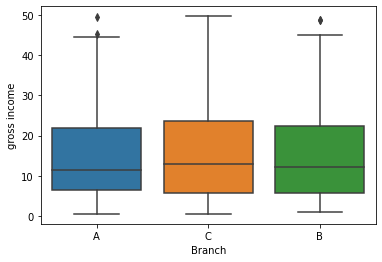

In [24]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

#### Is there a relation between gender and gross income?

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

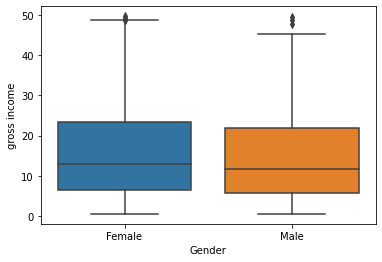

In [25]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

#### Is there a noticeabe time trend in gross income?

In [26]:
#In time trends like these, many entries take place on the same day. So we have to take the dates in the aggregate manner.
#This means that, if at a particular date there are 5 entries. Then for value for every variable(column) will be the 
# aggregate/group of those 5 entries. And these values will be under the single time entry

df.groupby(df.index).mean()

# Hence values have been aggregated for the dates on the basis of mean, but we can use any aggregation criteria


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


<AxesSubplot:xlabel='Date', ylabel='gross income'>

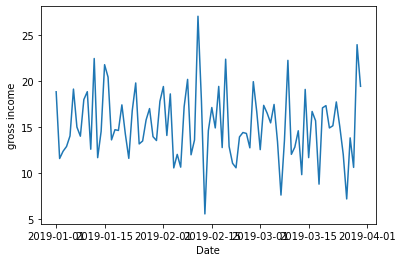

In [27]:
sns.lineplot(x=df.groupby(df.index).mean().index,
            y=df.groupby(df.index).mean()['gross income'])

In [28]:
#But the above notation is way to big.
abscissa= df.groupby(df.index).mean().index 
# we cannot use "df.groupby(df.index).mean()" because this gives us a aggregated dataframe,
#But we require the indices of the aggregated data. hence the ".index" is put at the end
abscissa

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

In [29]:
ordinate = df.groupby(df.index).mean()['gross income']
ordinate
z = df['gross income'].groupby(df.index).mean()
z

#As you can see, we get the same value anyways in both the cases

Date
2019-01-01    18.830083
2019-01-02    11.580375
2019-01-03    12.369813
2019-01-04    12.886417
2019-01-05    14.034458
                ...    
2019-03-26     7.188692
2019-03-27    13.822950
2019-03-28    10.616200
2019-03-29    23.947875
2019-03-30    19.424500
Name: gross income, Length: 89, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='gross income'>

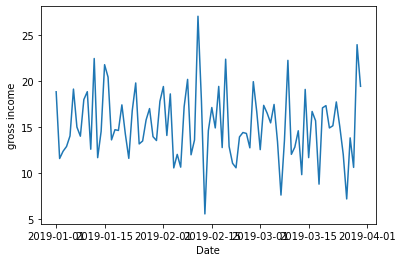

In [30]:
sns.lineplot(x=abscissa,y=ordinate)
#This is a cleaner way to write the code

In [31]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

***The bottom 3 rows are duplicated***
Hence to summarize this, we do the following

In [33]:
df.duplicated().sum()
#this meanas that there are 3 rows with duplicated entries.

3

In [34]:
#to remove the duplicated entries, we do the following
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [35]:
df.drop_duplicates(inplace=True)
#because we want it to be a permament change in the dataset

In [38]:
df.duplicated().sum()
#zero entries shows that the duplicated entries have been dropped

0

*** How many issing values are there per column?***

In [39]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

Most of the columns have no missing values except 3

How do we see the extent of missing-ness of the data numerically and by visualization?

In [40]:
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

79% ,43%, 19% of its values are missing

<AxesSubplot:ylabel='Date'>

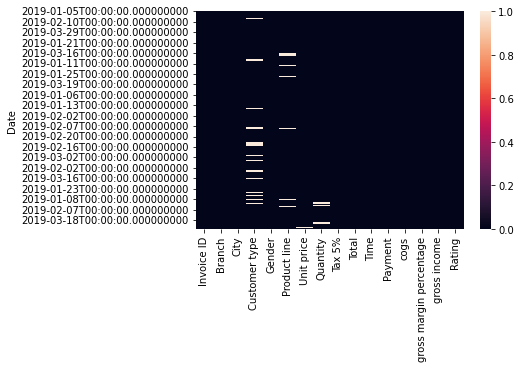

In [41]:
sns.heatmap(df.isnull())

We can see the indices on the y axis and the missing values are signified bby the white bars. If we want, we can remove the color bar as well


<AxesSubplot:ylabel='Date'>

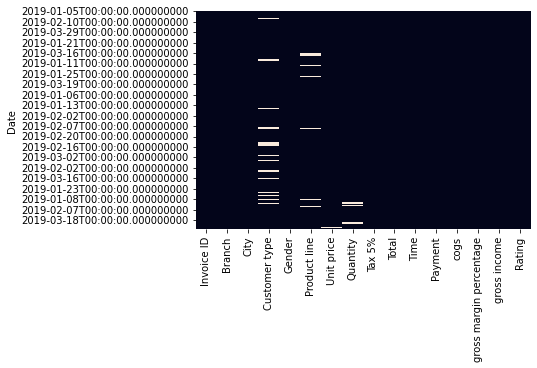

In [42]:
sns.heatmap(df.isnull(),cbar=False)